<font size ="+2"> 1 Introducción </font>

El siguiente ejemplo ilustra el comportamiento de un filtro de pase alto (High pass filter) que hace referencia a atenuar los componentes con una "frecuencia" baja, mientras que los componentes de alta frecuencia no se ven afectados.

(Esto es en el caso que trabajemos con un espectro de frecuencias, con respecto al trabajo con imágenes el filtro es aplicado a los píxeles de la imagen respectiva)

Con respecto a la imagen, su implementación es similar a pasar una imagen a escala de grises, pero solamente modificando aquellos píxeles que no superen cierto umbral. 



<font size ="+2"> 2 Armado del ambiente </font>

Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno colab.

In [24]:
#@title # 2.1 Parametros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen =  "https://alacontra.es/wp-content/uploads/2019/12/RIQUELME103300.jpg?raw=true" #@param {type:"string"}

#@markdown ---
#!wget https://resizer.glanacion.com/resizer/Wt7c9G_TCewfo1JU_YQh38ygBRY=/768x0/filters:quality(80)/cloudfront-us-east-1.images.arcpublishing.com/lanacionar/BPZX5263MZDBFNHZDVZ5BLP73Y.jpg -O imagen.jpg

!wget {url_imagen} -O imagen.jpg

--2021-11-21 18:03:41--  https://alacontra.es/wp-content/uploads/2019/12/RIQUELME103300.jpg?raw=true
Resolving alacontra.es (alacontra.es)... 31.47.76.119
Connecting to alacontra.es (alacontra.es)|31.47.76.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993873 (971K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 970.58K  1.80MB/s    in 0.5s    

2021-11-21 18:03:42 (1.80 MB/s) - ‘imagen.jpg’ saved [993873/993873]



<font size="+2"> 3 - Desarrollo CPU </font>

Código que resuelve el ejercicio desde el punto de vista secuencial. Partimos de la base de una imagen en escala de grises, que luego de aplicar el filtro, los píxeles que no sobrepasan el umbral son atenuados.

En este ejemplo, se genera una imagen con fftpack (Se lo pasa a un espectro de frecuencias, así es como se trabaja en electrónica este filtro), luego se le aplica el filtro de paso alto (High Pass Filter) y obtenemos la imagen correspondiente.

Tambien podríamos haber utilizado la siguiente matriz: 

              [-1, -1, -1]
              [-1,  8, -1]
              [-1, -1, -1]

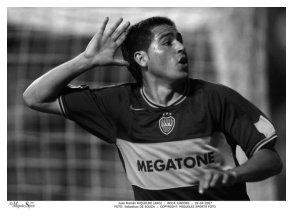

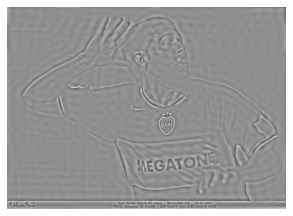

Tiempo CPU:  1359.865 [ms]


In [39]:
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp

from datetime import datetime
tiempo_total = datetime.now()

# ----------------------------------------------------------
# Definición de función que transforma el tiempo en milisegundos
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# ----------------------------------------------------------

im = np.mean(imread('imagen.jpg'), axis=2) # assuming an RGB image
plt.figure(figsize=(5,5))
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)

(w, h) = im.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 25
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies

tiempo_total = datetime.now() - tiempo_total

im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(5,5))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

print("Tiempo CPU: ", tiempo_en_ms(tiempo_total), "[ms]")




<font size="+2"> 4 - Desarrollo GPU </font>

Código que resuelve el ejercicio desde el punto de vista GPU. Partimos de la base de una imagen en escala de grises, que luego de aplicar el filtro, los píxeles que no sobrepasan el umbral son atenuados.

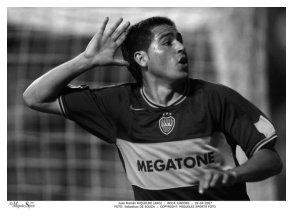

In [42]:
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp

from datetime import datetime
tiempo_total = datetime.now()

# ----------------------------------------------------------
# Definición de función que transforma el tiempo en milisegundos
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# ----------------------------------------------------------

im = np.mean(imread('imagen.jpg'), axis=2) # assuming an RGB image
plt.figure(figsize=(5,5))
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<font size="+2"> 5 - Conclusiones y Bibliografía </font>

- Bibliografía ejemplo HPF CPU: [High Pass Filter CPU](https://stackoverflow.com/questions/6094957/high-pass-filter-for-image-processing-in-python-by-using-scipy-numpy)

